## Example plot for paper (figure 6b)

In [6]:
import numpy as np
from io_functions import load_data  
from core_functions import mask_domain, cut_region, get_representative_member
from mapplot_functions import plot_map_base

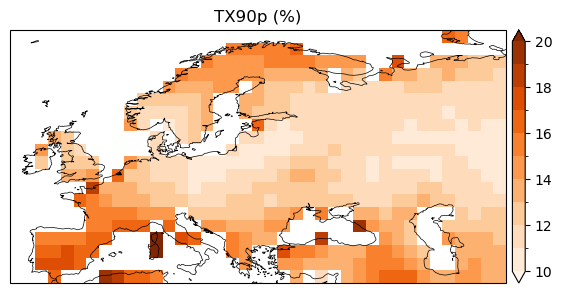

In [12]:
da = load_data('tx90p')  # select index
eu = cut_region(da, lat_bounds=[35, 72], lon_bounds=[-12, 60])  # select Europe
eu = mask_domain(eu)  # mask ocean
eu_min = get_representative_member(eu, 'min')  # get member with lowest regional average
plot_map_base(eu_min, cmap='Oranges', levels=range(10, 21, 1), extend='both');

---


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from io_functions import load_data  
from core_functions import aggregate_members, mask_domain, cut_region, get_representative_member, aggregate_area
from mapplot_functions import plot_map_base
from boxplot_functions import plot_box_base

## Load data for a given index

In [2]:
da = load_data('tx90p')

## Default overview plots

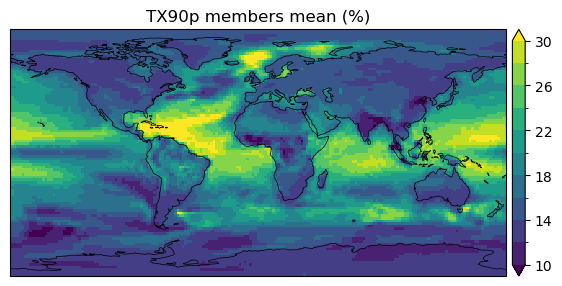

In [3]:
tmp = aggregate_members(da)  # defaults to member mean
plot_map_base(tmp);

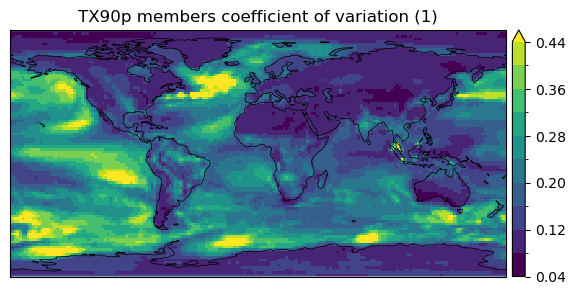

In [4]:
tmp = aggregate_members(da, 'cv') 
plot_map_base(tmp);

## Additional data processing

In [5]:
# select only European land
eu = cut_region(da, lat_bounds=[35, 72], lon_bounds=[-12, 60])
eu = mask_domain(eu)

In [6]:
# some plotting arguments
kwargs = {
    'cmap': 'Oranges',
    'levels': range(10, 21, 1),
    'extend': 'both',
}

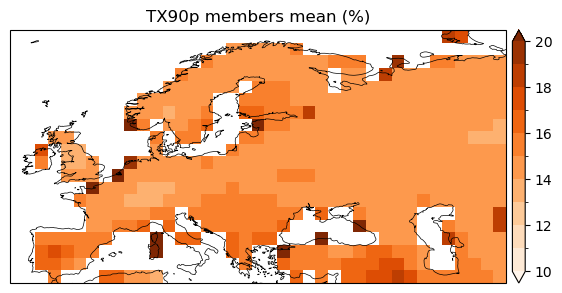

In [7]:
plot_map_base(aggregate_members(eu, 'mean'), **kwargs);

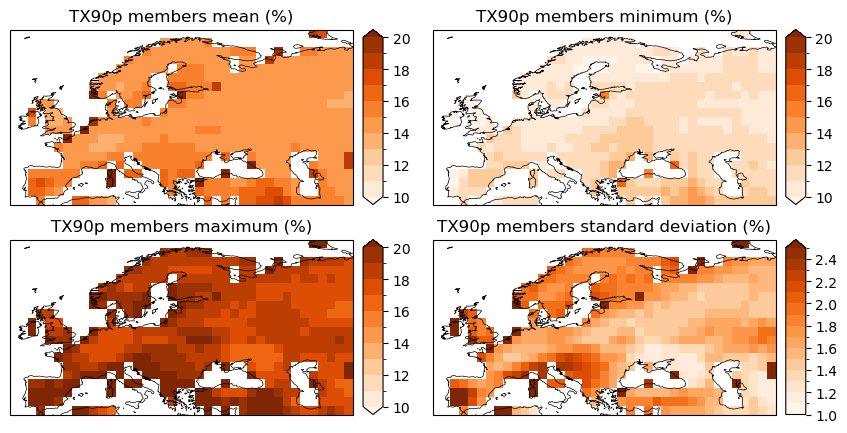

In [8]:
# by creating axes first we can also plot multiple maps in one figure
fig, axes = plt.subplots(2, 2, figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})

ax = axes.ravel()[0]
plot_map_base(aggregate_members(eu, 'mean'), ax=ax, **kwargs)

ax = axes.ravel()[1]
plot_map_base(aggregate_members(eu, 'min'), ax=ax, **kwargs)

ax = axes.ravel()[2]
plot_map_base(aggregate_members(eu, 'max'), ax=ax, **kwargs)

ax = axes.ravel()[3]
plot_map_base(aggregate_members(eu, 'std'), ax=ax, cmap='Oranges', levels=np.arange(1, 2.51, .1))

## Selecting representative members

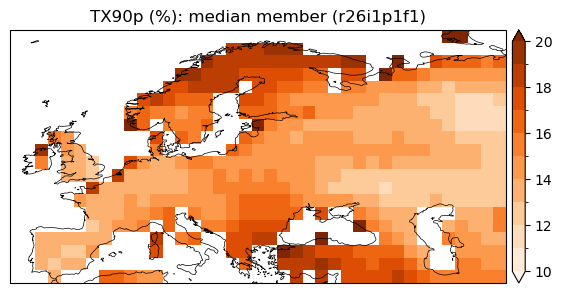

In [9]:
tmp = get_representative_member(eu, 'median')
p = plot_map_base(tmp, **kwargs)
p.axes.set_title('{}: median member ({})'.format(p.axes.get_title(), tmp['member'].item()));

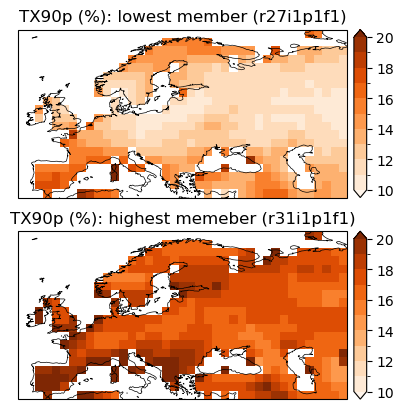

In [10]:
fig, axes = plt.subplots(2, subplot_kw={'projection': ccrs.PlateCarree()})

ax = axes.ravel()[0]
tmp = get_representative_member(eu, 'min')
p = plot_map_base(tmp, ax=ax, **kwargs)
ax.set_title('{}: lowest member ({})'.format(p.axes.get_title(), tmp['member'].item()))

ax = axes.ravel()[1]
tmp = get_representative_member(eu, 'max')
p = plot_map_base(tmp, ax=ax, **kwargs)
ax.set_title('{}: highest memeber ({})'.format(p.axes.get_title(), tmp['member'].item()));

## Boxplots of regional mean values

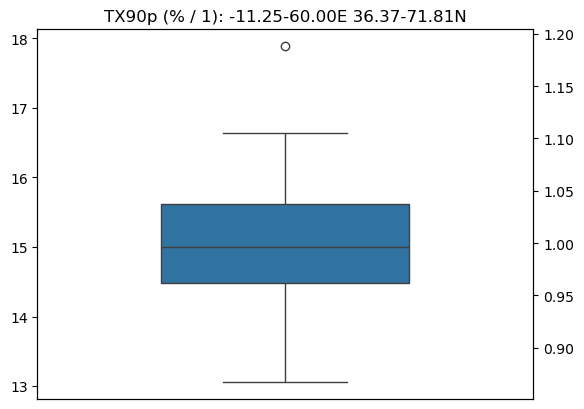

In [11]:
plot_box_base(eu);

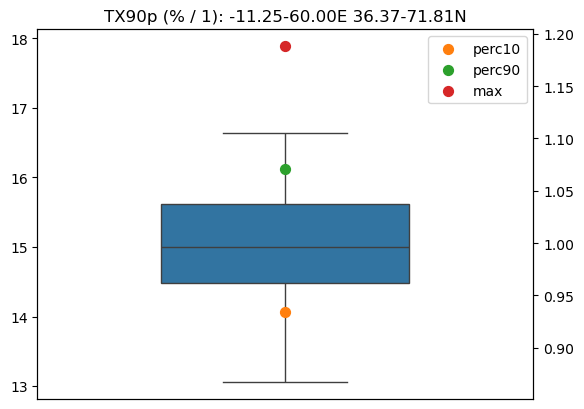

In [12]:
ax = plot_box_base(eu)

tmp = get_representative_member(eu, .1)
ax.scatter(0, aggregate_area(tmp), s=50, zorder=99, label='perc10')

tmp = get_representative_member(eu, .9)
ax.scatter(0, aggregate_area(tmp), s=50, zorder=99, label='perc90')

tmp = get_representative_member(eu, 'max')
ax.scatter(0, aggregate_area(tmp), s=50, zorder=99, label='max')

ax.legend()

---
# Plot all

In [22]:
temperature_based_indices = [
    'txx', 'txn', 'tnn', 'tnx',
    'tx90p', 'tx10p', 'tn10p', 'tn90p',
    'wsdi', 'csdi',
    'su', 'tr', 'fd', 'id',
    'dtr', 'gsl',
]
temperature_based_indices = {index: load_data(index) for index in temperature_based_indices}

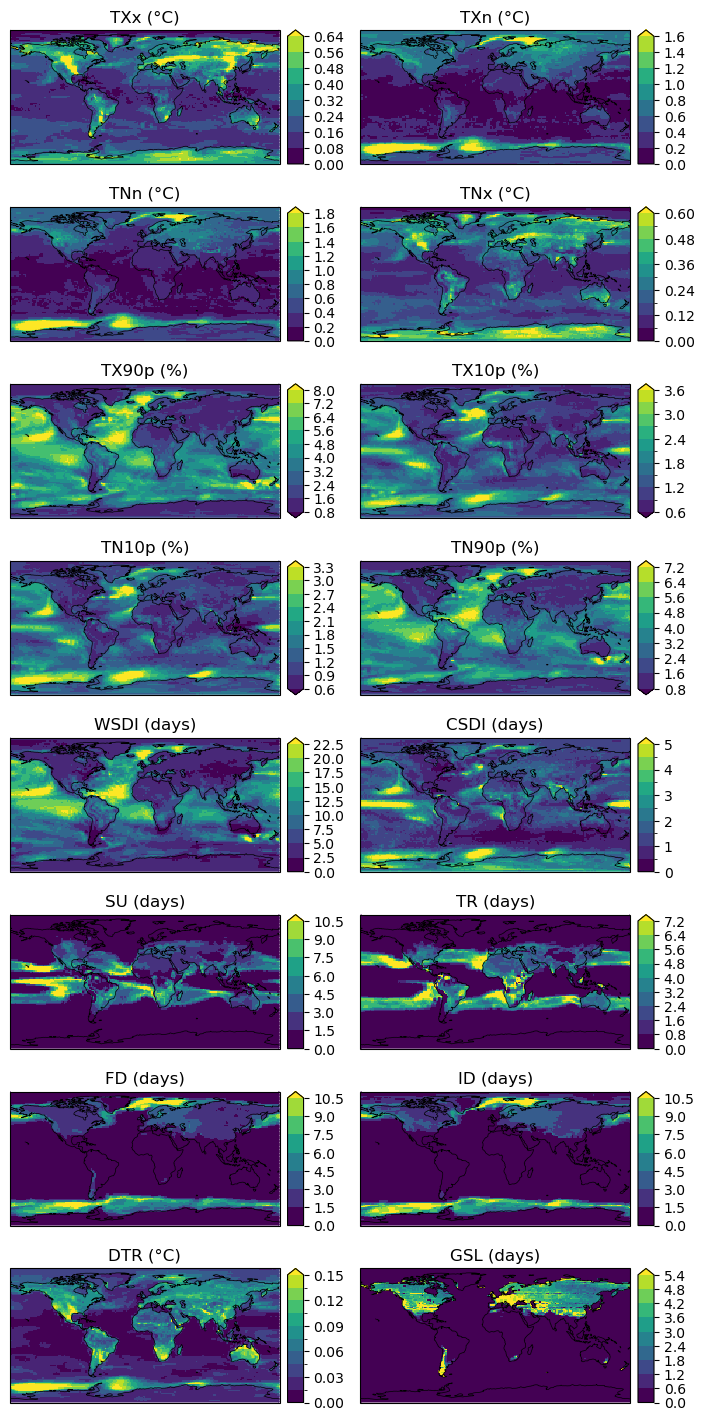

In [29]:
fig, axes = plt.subplots(8, 2, figsize=(8, 18), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(wspace=.3)

for ii, (index, da) in enumerate(temperature_based_indices.items()):
    ax = axes.ravel()[ii]
    plot_map_base(aggregate_members(da, 'std'), ax=ax);
    ax.set_title('{} ({})'.format(da.attrs.get('long_name', index), da.attrs.get('units', 'na')))

# fig.suptitle('Standard deviation temperature-based indices')  # behaves strange

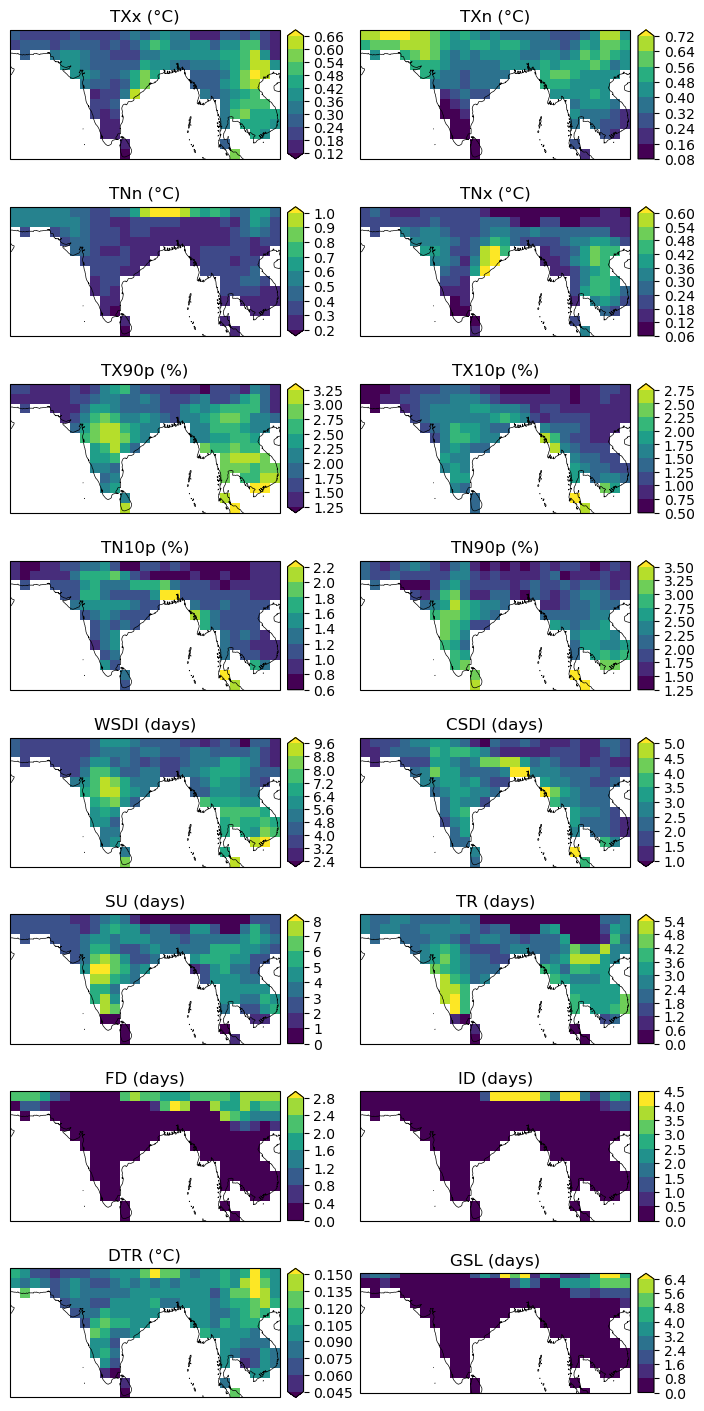

In [28]:
fig, axes = plt.subplots(8, 2, figsize=(8, 18), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(wspace=.3)

for ii, (index, da) in enumerate(temperature_based_indices.items()):
    ax = axes.ravel()[ii]
    # ax.set_extent([60, 110, 5, 30])  # note that just setting the extent will lead to automatic color levels still adjusting to global!
    plot_map_base(mask_domain(cut_region(aggregate_members(da, 'std'), lon_bounds=[60, 110], lat_bounds=[5, 30])), ax=ax);
    ax.set_title('{} ({})'.format(da.attrs.get('long_name', index), da.attrs.get('units', 'na')))

In [16]:
precipitation_based_indices = [
    'prcptot', 'sdii',
    'rx1day', 'rx5day',
    'r95p', 'r99p',
    'r10mm', 'r20mm',
    'cdd', 'cwd',
]
precipitation_based_indices = {index: load_data(index) for index in precipitation_based_indices}

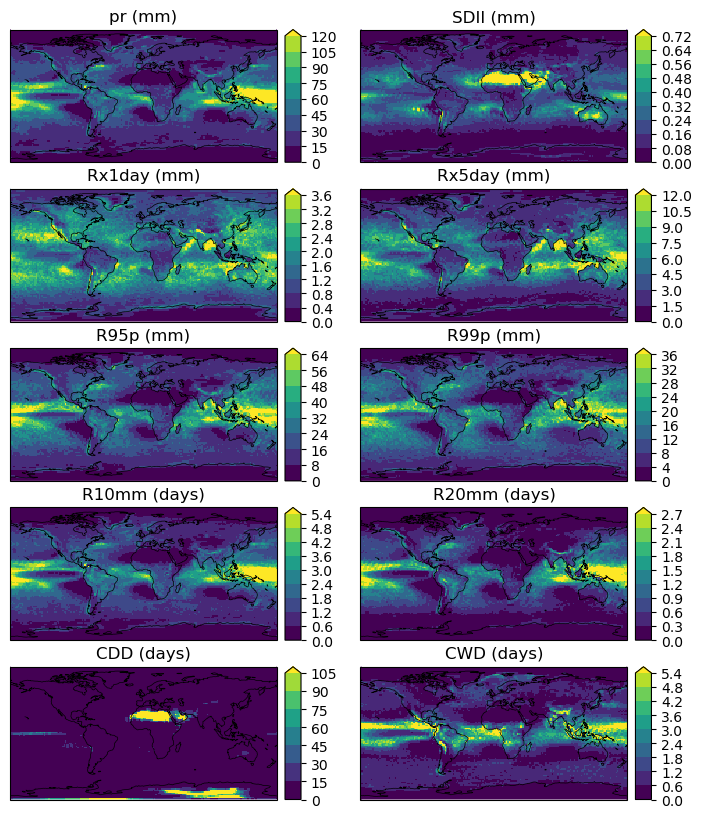

In [33]:
fig, axes = plt.subplots(5, 2, figsize=(8, 10), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(wspace=.3)

for ii, (index, da) in enumerate(precipitation_based_indices.items()):
    ax = axes.ravel()[ii]
    plot_map_base(aggregate_members(da, 'std'), ax=ax);
    ax.set_title('{} ({})'.format(da.attrs.get('long_name', index), da.attrs.get('units', 'na')))

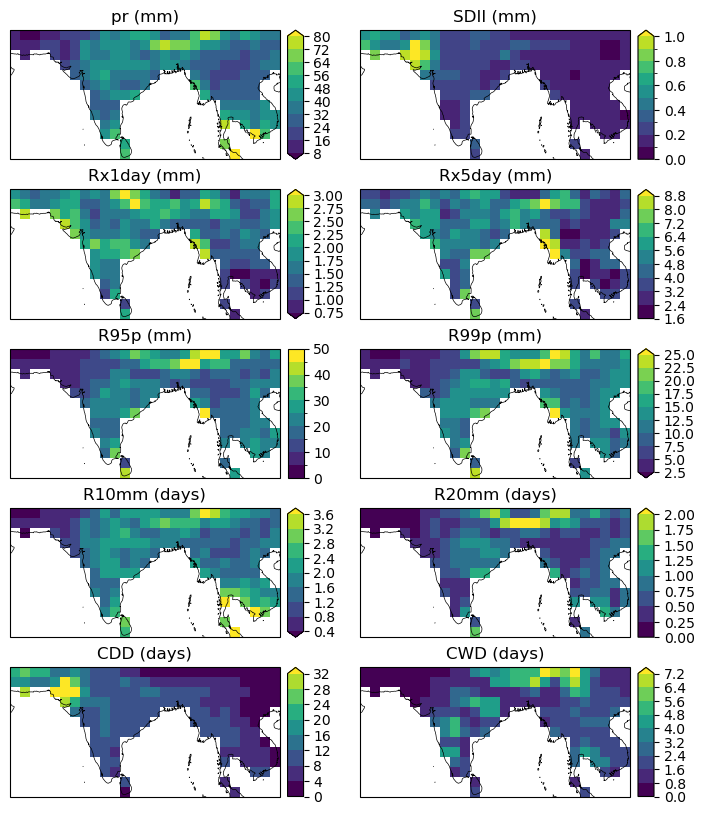

In [32]:
fig, axes = plt.subplots(5, 2, figsize=(8, 10), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(wspace=.3)

for ii, (index, da) in enumerate(precipitation_based_indices.items()):
    ax = axes.ravel()[ii]
    # ax.set_extent([60, 110, 5, 30])  
    plot_map_base(mask_domain(cut_region(aggregate_members(da, 'std'), lon_bounds=[60, 110], lat_bounds=[5, 30])), ax=ax);
    ax.set_title('{} ({})'.format(da.attrs.get('long_name', index), da.attrs.get('units', 'na')))